# Imports

In [1]:
import sys

stdout = sys.stdout

import htsexperimentation as htsx
import tsaugmentation as tsag
import properscoring as ps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 100)

sys.stdout = stdout
sns.set()
plt.rcParams.update({'font.size': 22})

# Parameters

In [2]:
datasets=['prison', 'tourism', 'm5', 'police']
algorithms=[
            "gpf",
            "mint",
            "deepar",
            #"standard_gp_lin",
            "standard_gp_pie",
            #"standard_gp_zer",
            "ets_bu",
            #"arima_bu"
        ]

# Loading data
dataset = 'prison'
data = tsag.preprocessing.PreprocessDatasets(dataset).apply_preprocess()
true = data['predict']['data'].reshape((data['predict']['s'], data['predict']['n'])).T

Number of groups: 3
	state: 8
	gender: 2
	legal: 2
Total number of series: 32
Number of points per series for train: 40
Total number of points: 48
Seasonality: 4
Forecast horizon: 8


# Calculation of CRPS - example for a single series

### GPF

In [3]:
#e = htsx.compute_results.get_output(dataset, 'gpf', 'jitter')
#series = 9
#plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['samples']['bottom'][-data['h']:, series, :], alpha=0.05, color='blue')
#plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
#plt.plot(true[:,series], color='black', label='data')
#plt.legend();

In [4]:
#ps.crps_ensemble(true[-data['h']:, series], e['predictions']['samples']['bottom'][-data['h']:, series, :]).mean()

### MinT

In [5]:
#e = htsx.compute_results.get_output(dataset, 'mint', 'jitter')
#series = 9
#plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['samples']['bottom'][-data['h']:, series, :], alpha=0.05, color='blue')
#plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
#plt.plot(true[:,series], color='black', label='data')
#
#plt.legend();

In [6]:
#ps.crps_ensemble(true[-data['h']:, series], e['predictions']['samples']['bottom'][-data['h']:, series, :]).mean()

### DeepAR

In [7]:
#e = htsx.compute_results.get_output(dataset, 'deepar', 'jitter')
#series = 9
#plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['samples']['bottom'][-data['h']:, series, :], alpha=0.05, color='blue')
#plt.plot(np.arange(data['train']['n'], data['predict']['n']), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
#plt.plot(true[:,series], color='black', label='data')
#plt.legend();

In [8]:
#ps.crps_ensemble(true[-data['h']:, series], e['predictions']['samples']['bottom'][-data['h']:, series, :]).mean()

# Calculation of MASE for each algorithm

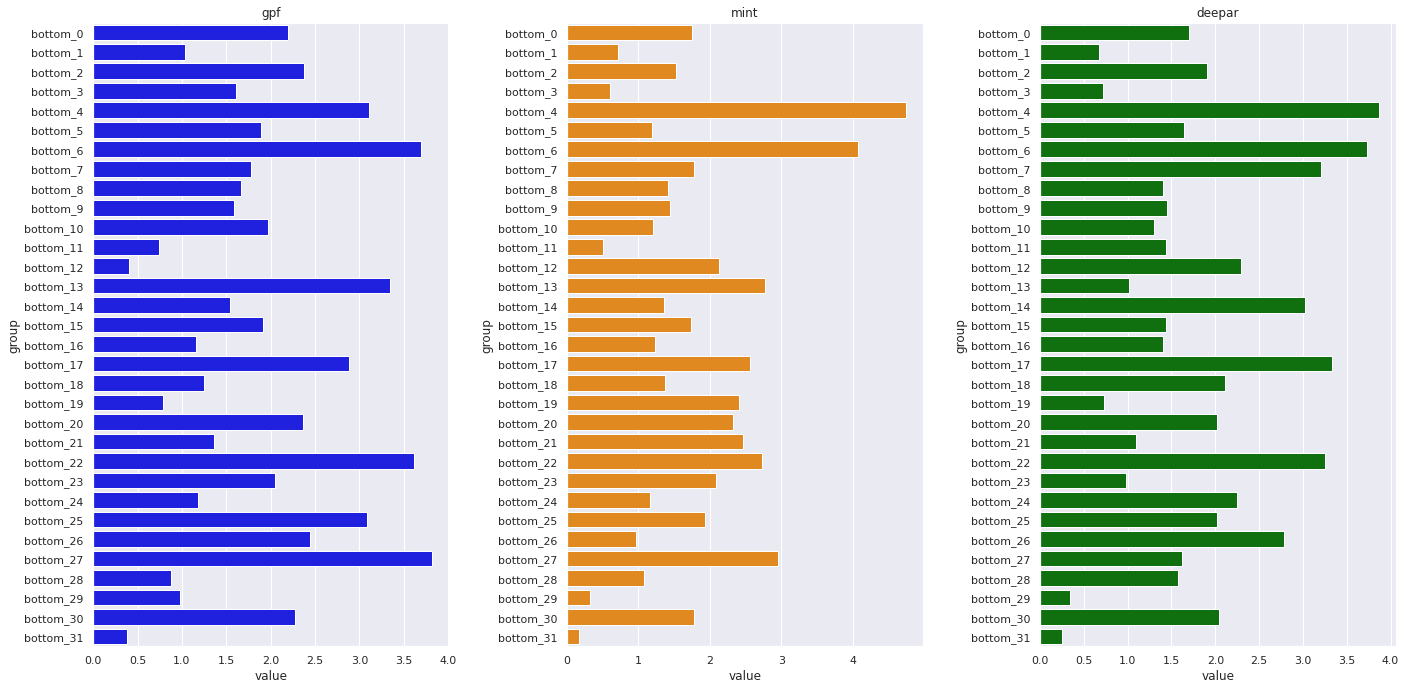

In [9]:
htsx.visualization.plot_compare_err_metric('mase', 'prison', figsize=(20, 10))

# Calculating aggregate results for all algorithms

In [10]:
df_orig_list = htsx.compute_results.calculate_agg_results_all_datasets(datasets, 
                                                                       algorithms, 
                                                                       'mase')

algorithms=[
            "gphf",
            "mint",
            "deepar",
            "standard_gp_pie",
            "ets_bu",
        ]

# Change the name of our algorithm to GPHF
for i in range(len(datasets)):
    sorter = algorithms
    df_orig_list[i]['algorithm'] = df_orig_list[i]['algorithm'].str.replace('gpf', 'gphf', regex=False)
    df_orig_list[i] = df_orig_list[i].sort_values(by="group")
    df_orig_list[i].algorithm = df_orig_list[i].algorithm.astype("category")
    df_orig_list[i].algorithm.cat.set_categories(sorter, inplace=True)

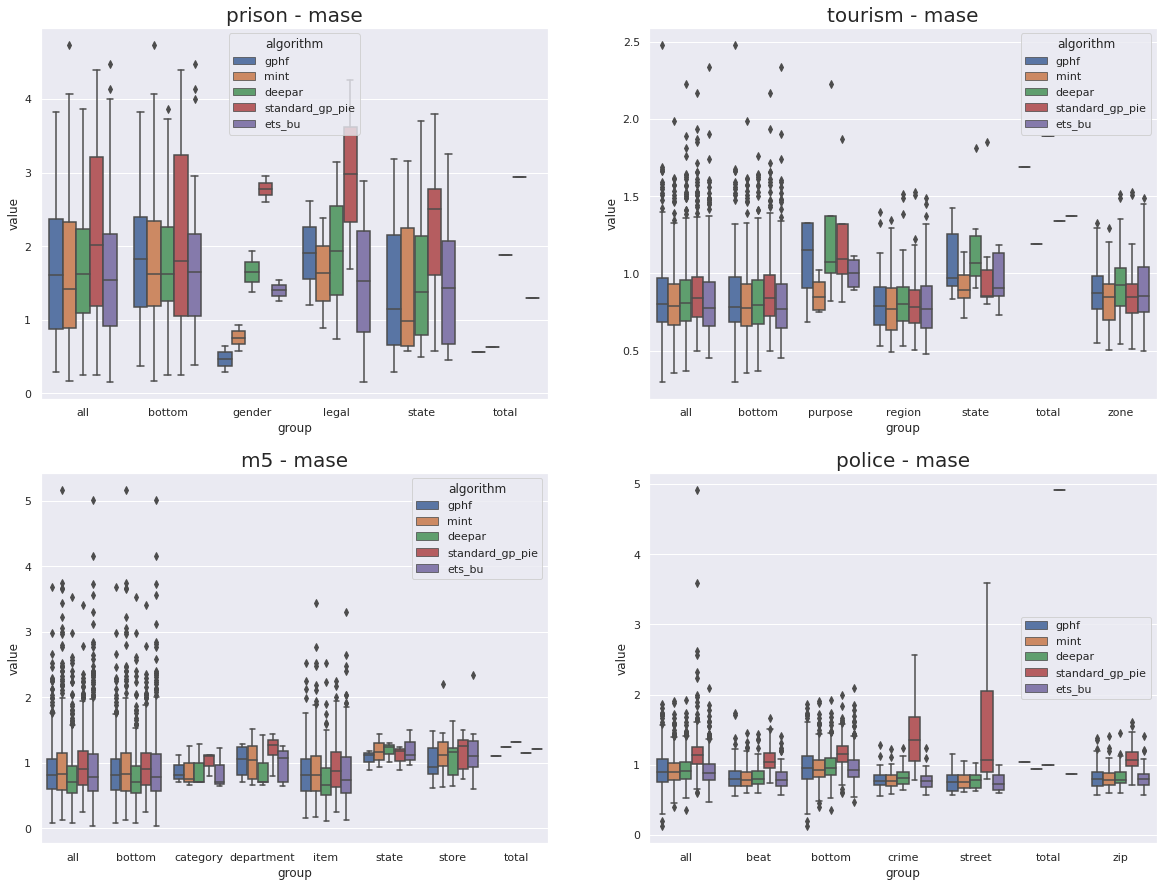

In [11]:
htsx.visualization.boxplot_error(df_orig_list, 'mase', datasets, figsize=(20, 15))

In [12]:
def print_res(dataset, df_orig_list):
    dataset_idx = datasets.index(dataset)
    df = df_orig_list[dataset_idx]
    df = df.sort_values(by=['algorithm', 'group'])[['algorithm', 'group', 'value']]
    df = df.groupby(['algorithm', 'group']).mean()['value'].reset_index()
    return df

In [13]:
print_res('prison', df_orig_list)

,algorithm,group,value
0,gphf,all,1.744400
1,gphf,bottom,1.918000
2,gphf,gender,0.466000
3,gphf,legal,1.908500
4,gphf,state,1.476000
5,gphf,total,0.565000
6,mint,all,1.643800
7,mint,bottom,1.766406
8,mint,gender,0.757000
9,mint,legal,1.633000


In [14]:
print_res('tourism', df_orig_list)

,algorithm,group,value
0,gphf,all,0.848919
1,gphf,bottom,0.844092
2,gphf,purpose,1.079500
3,gphf,region,0.806105
4,gphf,state,1.081571
5,gphf,total,1.692000
6,gphf,zone,0.898074
7,mint,all,0.819375
8,mint,bottom,0.820579
9,mint,purpose,0.865000


In [15]:
print_res('m5', df_orig_list)

,algorithm,group,value
0,gphf,all,0.879339
1,gphf,bottom,0.876374
2,gphf,category,0.880333
3,gphf,department,1.022800
4,gphf,item,0.869931
5,gphf,state,1.068667
6,gphf,store,1.026900
7,gphf,total,1.103000
8,mint,all,0.941974
9,mint,bottom,0.947420


In [16]:
print_res('police', df_orig_list)

,algorithm,group,value
0,gphf,all,0.929583
1,gphf,beat,0.846215
2,gphf,bottom,0.964002
3,gphf,crime,0.809421
4,gphf,street,0.784900
5,gphf,total,1.044000
6,gphf,zip,0.824985
7,mint,all,0.921135
8,mint,beat,0.825304
9,mint,bottom,0.958348


In [17]:
df_orig_list = htsx.compute_results.calculate_agg_results_all_datasets(datasets, 
                                                                       algorithms, 
                                                                       'CRPS')
htsx.visualization.boxplot_error(df_orig_list, 'CRPS', datasets)

KeyError: 'CRPS'